In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
df = pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Informations sur le dataset
print("Dimensions du dataset:", df.shape)
df.info()

Dimensions du dataset: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Statistiques descriptives
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Vérification des valeurs manquantes
print("Nombre de valeurs manquantes par colonne:")
print(df.isnull().sum())

# Vérification des valeurs nulles (qui sont réellement des données manquantes)
print("\nNombre de valeurs à zéro (potentiellement manquantes) par colonne:")
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    print(f"{column}: {(df[column] == 0).sum()} valeurs à zéro")

Nombre de valeurs manquantes par colonne:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Nombre de valeurs à zéro (potentiellement manquantes) par colonne:
Glucose: 5 valeurs à zéro
BloodPressure: 35 valeurs à zéro
SkinThickness: 227 valeurs à zéro
Insulin: 374 valeurs à zéro
BMI: 11 valeurs à zéro


Distribution de la variable cible:
Outcome
0    500
1    268
Name: count, dtype: int64
Pourcentage:
Outcome
0    65.1
1    34.9
Name: proportion, dtype: float64


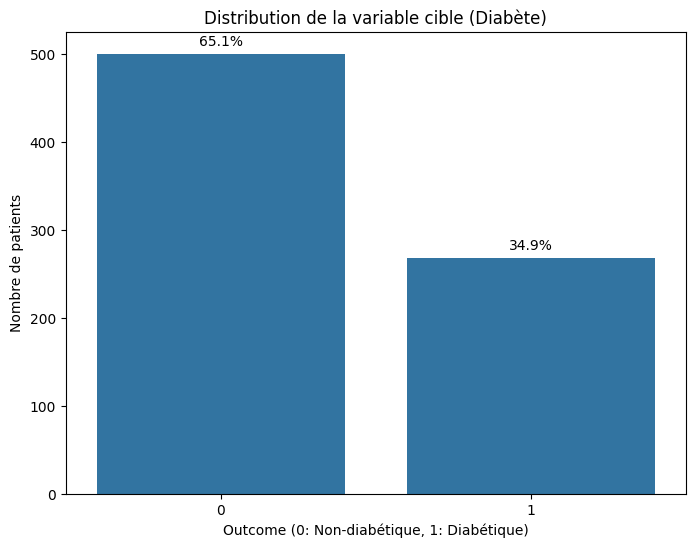

In [12]:
# Distribution de la variable cible
print("Distribution de la variable cible:")
print(df['Outcome'].value_counts())
print("Pourcentage:")
print(df['Outcome'].value_counts(normalize=True).round(3) * 100)

# Visualisation
plt.figure(figsize=(8, 6))
target_counts = df['Outcome'].value_counts()
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution de la variable cible (Diabète)')
plt.xlabel('Outcome (0: Non-diabétique, 1: Diabétique)')
plt.ylabel('Nombre de patients')

# Ajouter des pourcentages
percentages = df['Outcome'].value_counts(normalize=True).round(3) * 100
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 10, f'{percentages[i]:.1f}%', ha='center')
    
plt.show()

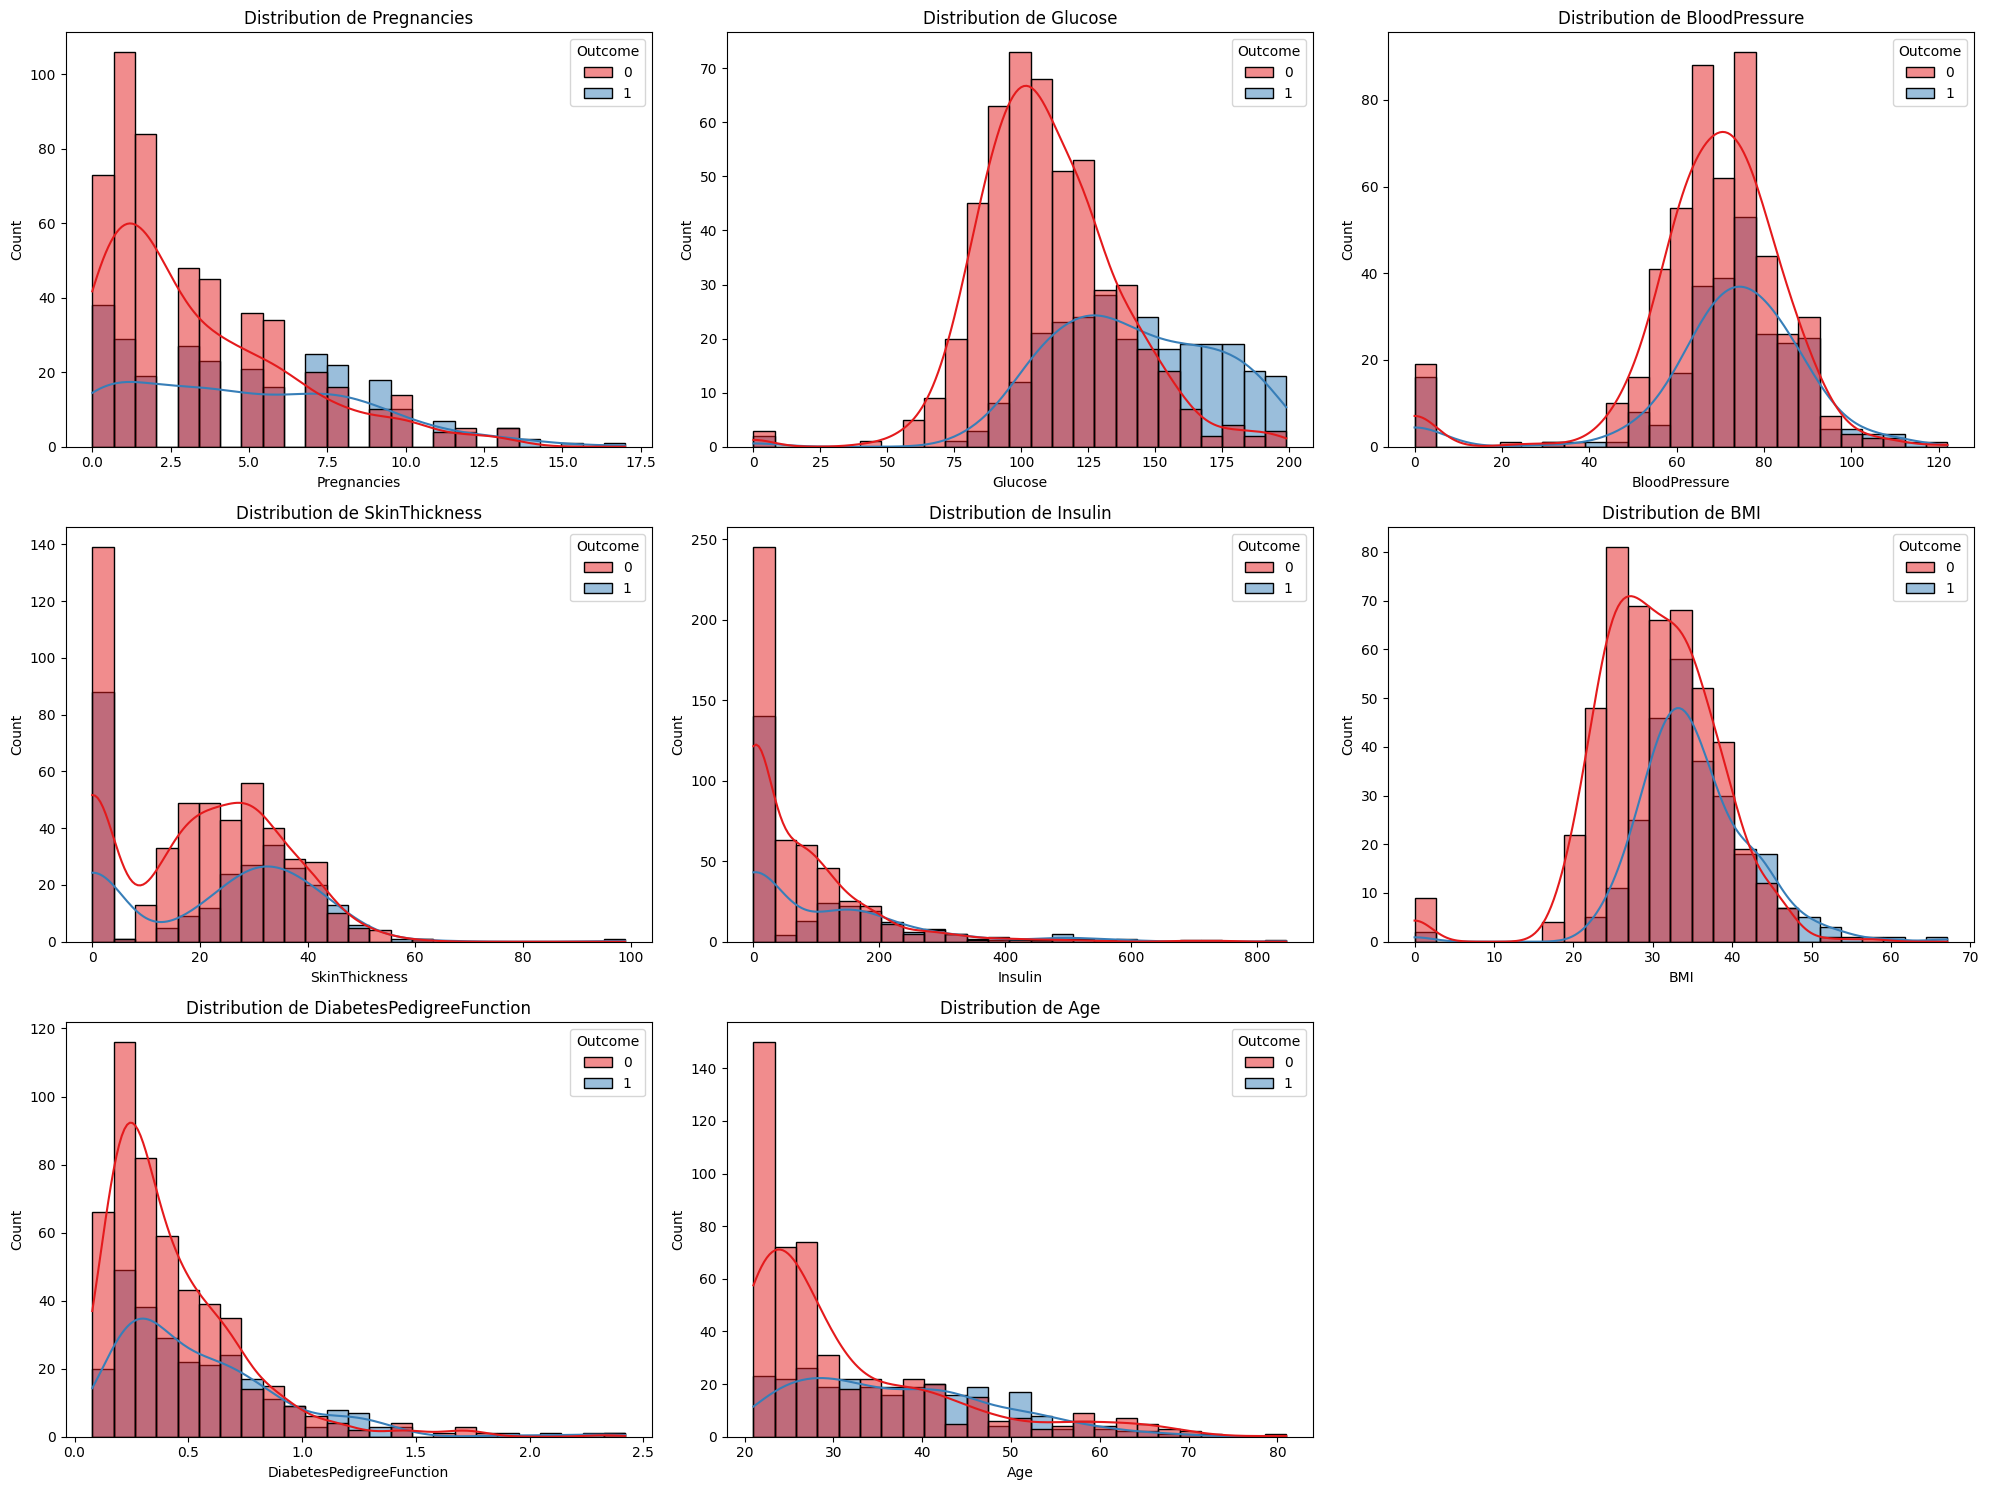

In [13]:
# Visualisation de la distribution des variables numériques
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=column, hue='Outcome', kde=True, bins=25, palette='Set1')
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

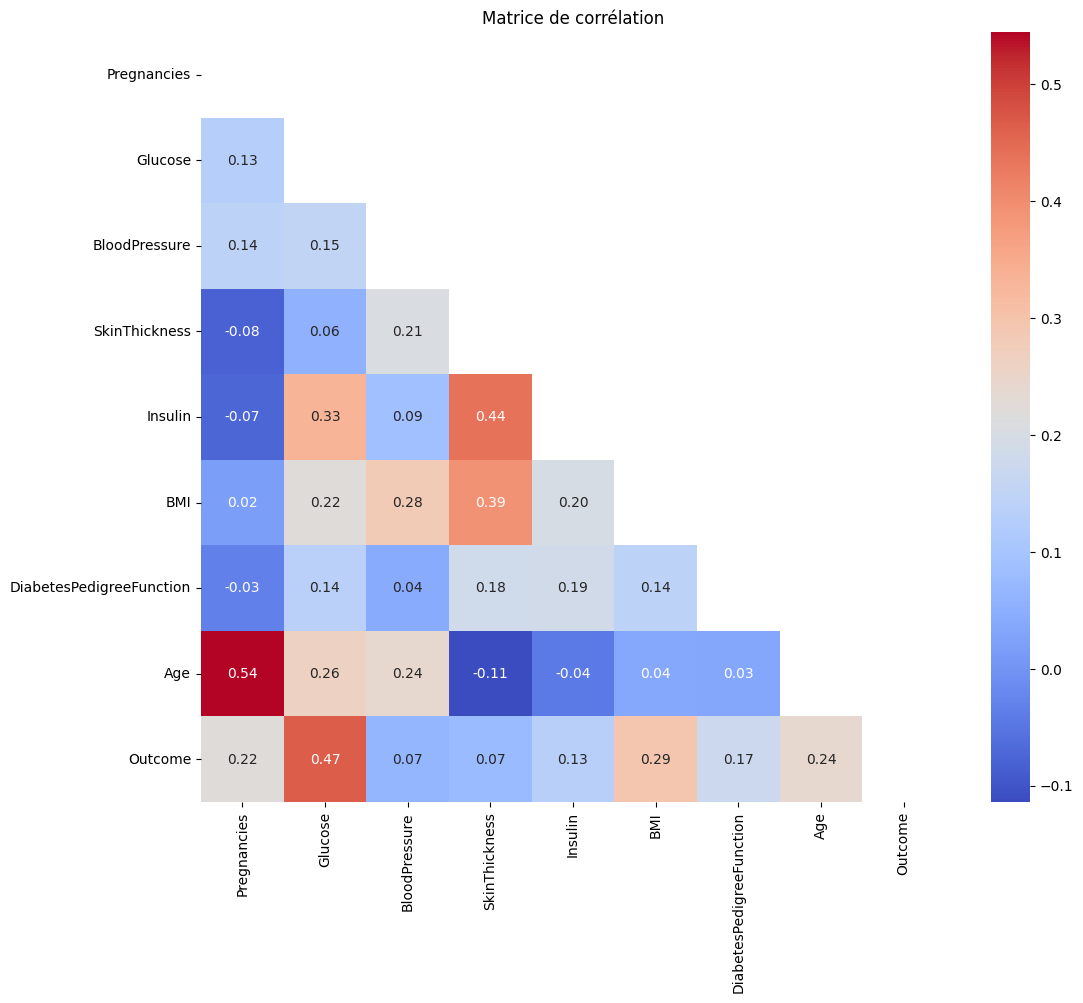

Corrélations avec la variable cible (Outcome):
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [18]:
# Matrice de corrélation
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Matrice de corrélation')
plt.show()

# Afficher les corrélations avec la variable cible
print("Corrélations avec la variable cible (Outcome):")
print(corr_matrix['Outcome'].sort_values(ascending=False))

In [19]:
# Création d'une copie propre du dataset
df_clean = df.copy()

# Remplacer les zéros par NaN là où c'est physiologiquement impossible
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df_clean[column] = df_clean[column].replace(0, np.nan)

# Imputation des valeurs manquantes par la médiane
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median_value = df_clean[column].median()
    df_clean[column] = df_clean[column].fillna(median_value)

# Vérification que toutes les valeurs manquantes ont été traitées
print("Nombre de valeurs manquantes après imputation:")
print(df_clean.isnull().sum())

# Comparer les statistiques avant/après imputation
print("\nStatistiques après imputation:")
print(df_clean.describe())

Nombre de valeurs manquantes après imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Statistiques après imputation:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000

Modèle: Régression Logistique
Accuracy: 0.7532
AUC: 0.8228
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

--------------------------------------------------
Modèle: Random Forest
Accuracy: 0.7338
AUC: 0.8341
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

--------------------------------------------------
Modèle: SVM
Accuracy: 0.7468
AUC: 0.8086
Classification Report:
              precision 

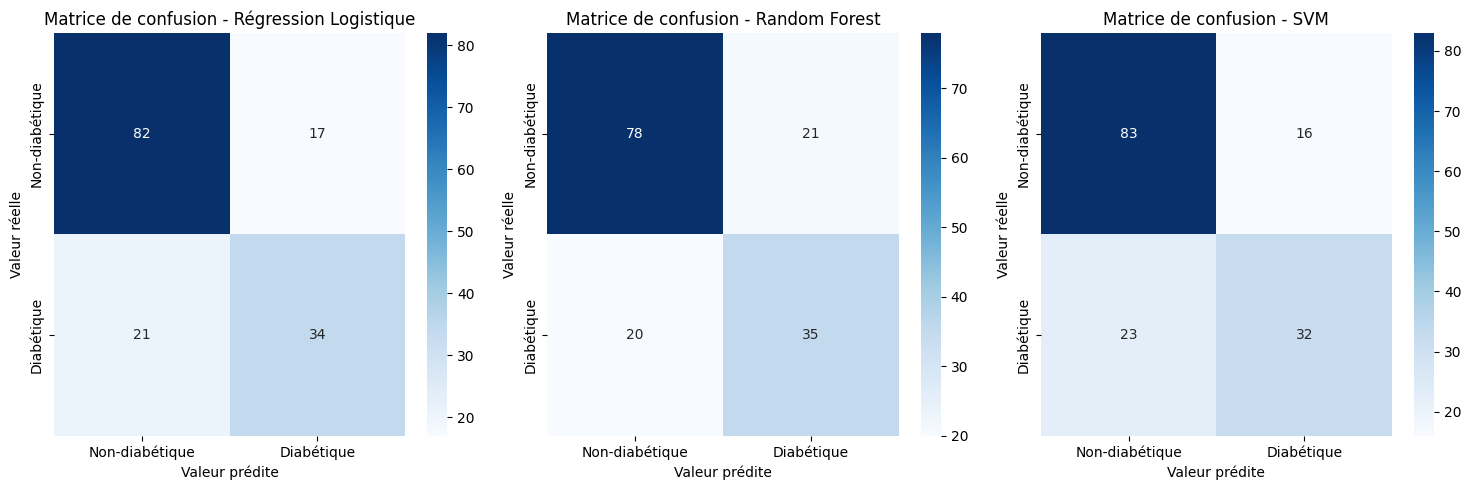

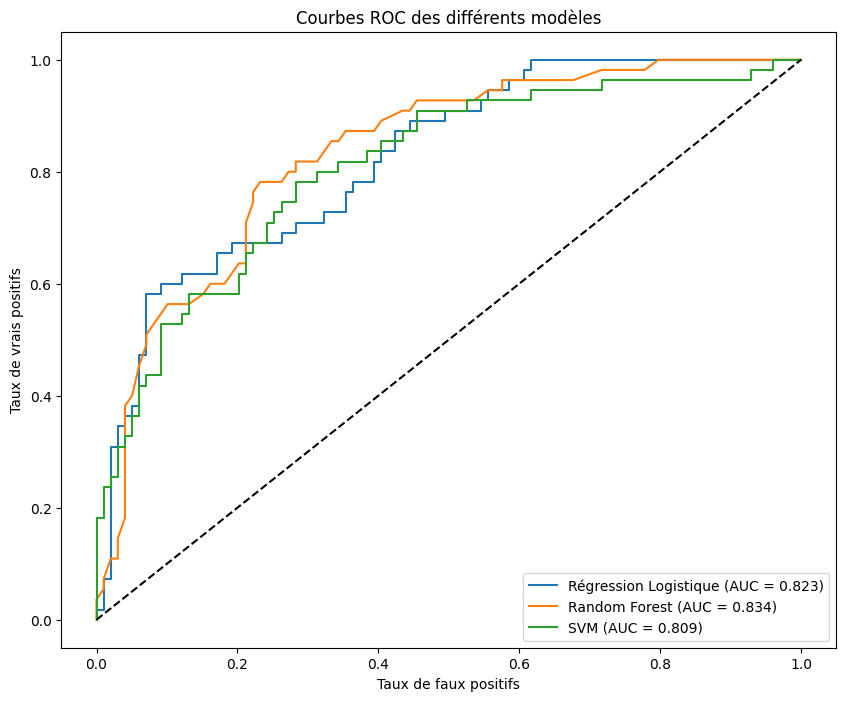

Le meilleur modèle est: Random Forest avec une AUC de 0.8341


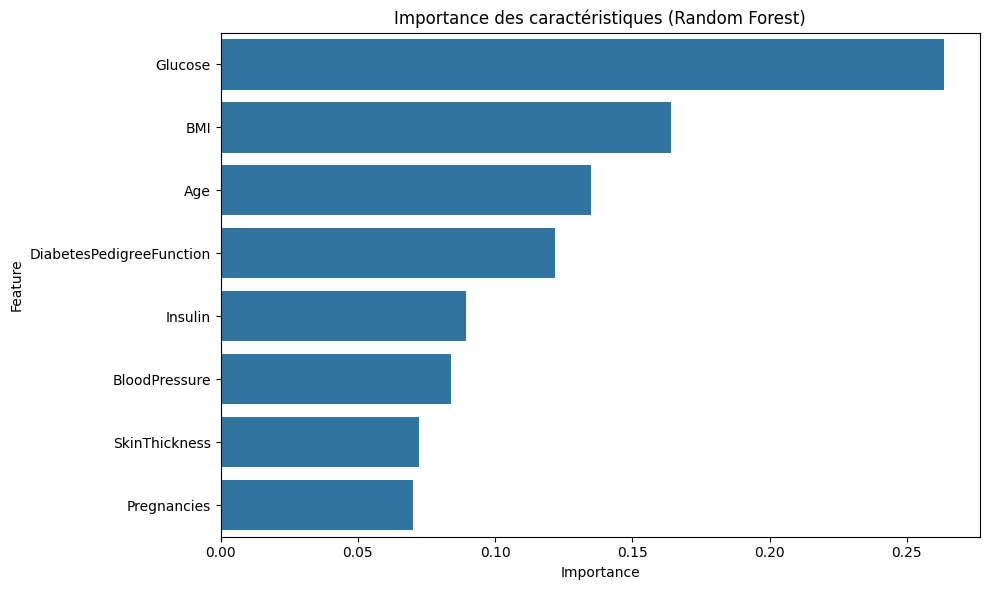

In [20]:
# Importation des bibliothèques pour la modélisation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Division des données en ensembles d'entraînement et de test
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création et entraînement des modèles
models = {
    "Régression Logistique": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Entraînement et évaluation des modèles
results = {}
for name, model in models.items():
    # Entraînement
    model.fit(X_train_scaled, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test_scaled)
    
    # Évaluation
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    
    # Calcul de la courbe ROC et AUC (pour les modèles qui le supportent)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Stockage des résultats
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc
    }
    
    print(f"Modèle: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(report)
    print("-" * 50)

# Visualisation des matrices de confusion
plt.figure(figsize=(15, 5))
for i, (name, result) in enumerate(results.items()):
    plt.subplot(1, 3, i+1)
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-diabétique', 'Diabétique'],
                yticklabels=['Non-diabétique', 'Diabétique'])
    plt.title(f'Matrice de confusion - {name}')
    plt.ylabel('Valeur réelle')
    plt.xlabel('Valeur prédite')
plt.tight_layout()
plt.show()

# Comparaison des courbes ROC
plt.figure(figsize=(10, 8))
for name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC des différents modèles')
plt.legend(loc='lower right')
plt.show()

# Identification du meilleur modèle
best_model_name = max(results, key=lambda x: results[x]['roc_auc'])
print(f"Le meilleur modèle est: {best_model_name} avec une AUC de {results[best_model_name]['roc_auc']:.4f}")

# Importance des caractéristiques (pour Random Forest)
if 'Random Forest' in results:
    rf_model = results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Importance des caractéristiques (Random Forest)')
    plt.tight_layout()
    plt.show()

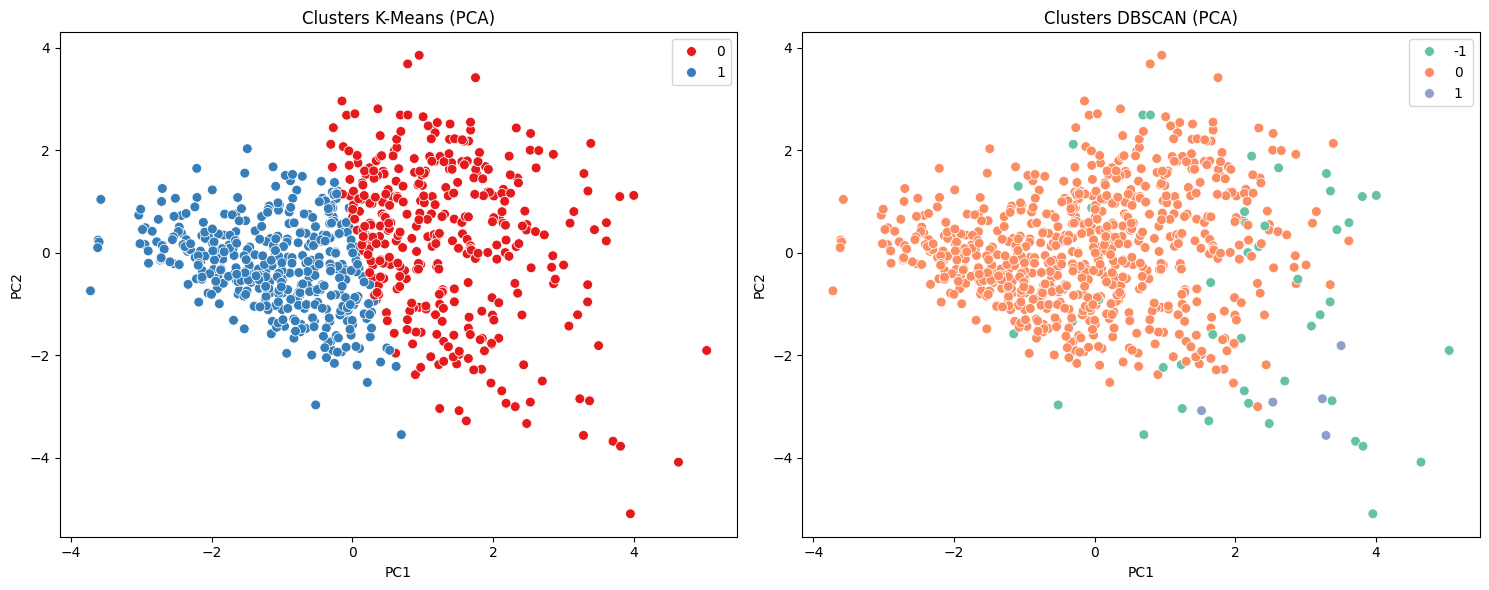

Correspondance entre clusters K-Means et réalité:
Diabétique         0    1
Cluster K-Means          
0                156  195
1                344   73

Variance expliquée par les deux premières composantes: 0.47
Variance expliquée par PC1: 0.29
Variance expliquée par PC2: 0.19


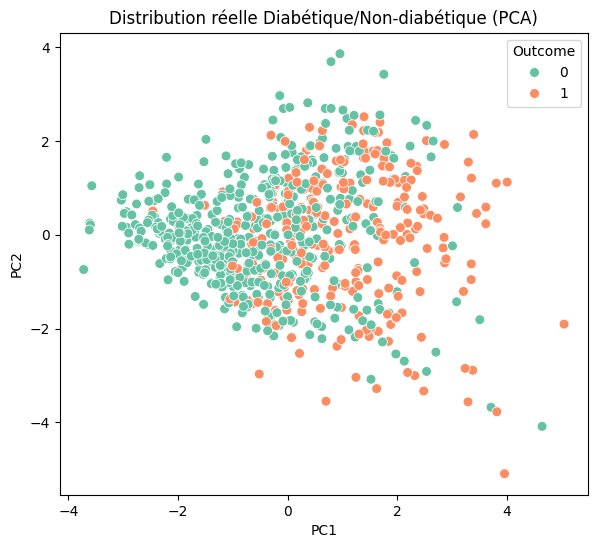

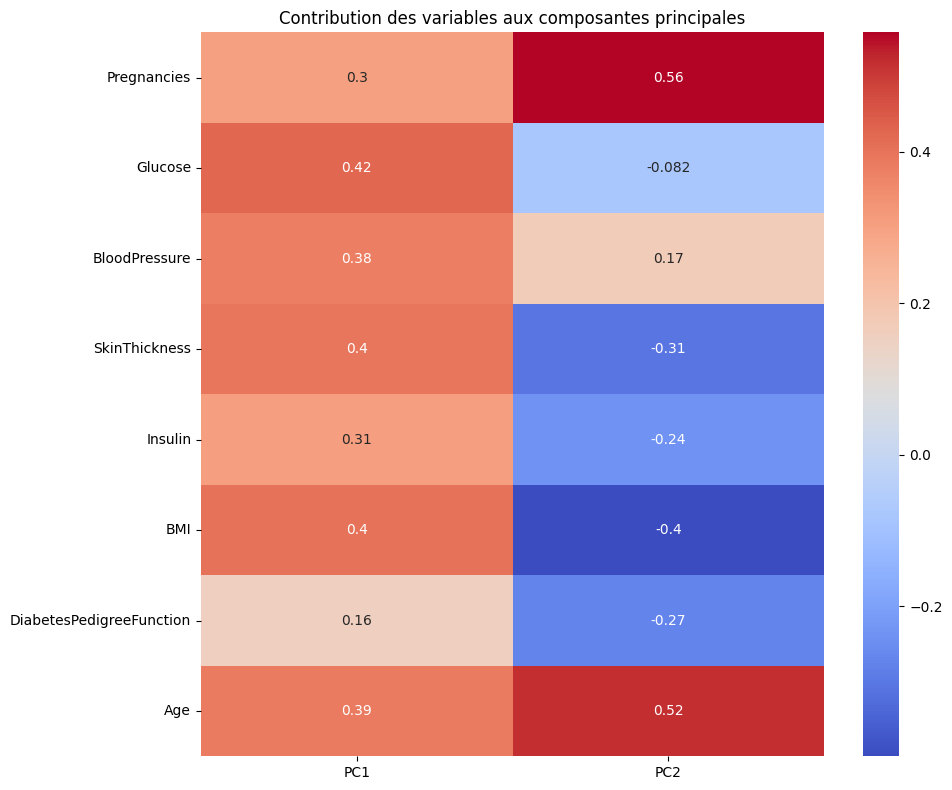

In [25]:
# Importation des bibliothèques pour le clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Préparation des données
X = df_clean.drop('Outcome', axis=1)

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de dimension avec PCA pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=2,min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualisation des clusters K-Means
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1', s=50)
plt.title('Clusters K-Means (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Visualisation des clusters DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='Set2', s=50)
plt.title('Clusters DBSCAN (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

# Comparaison des clusters avec la variable cible
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_clean['Outcome'], palette='Set2', s=50)
plt.title('Distribution réelle Diabétique/Non-diabétique (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Tableau de contingence pour évaluer la correspondance entre clusters et variable cible
kmeans_contingency = pd.crosstab(kmeans_labels, df_clean['Outcome'], rownames=['Cluster K-Means'], colnames=['Diabétique'])
print("Correspondance entre clusters K-Means et réalité:")
print(kmeans_contingency)

# Information sur la variance expliquée par PCA
print(f"\nVariance expliquée par les deux premières composantes: {np.sum(pca.explained_variance_ratio_):.2f}")
print(f"Variance expliquée par PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Variance expliquée par PC2: {pca.explained_variance_ratio_[1]:.2f}")

# Contribution des variables aux composantes principales
pca_components = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)
plt.figure(figsize=(10, 8))
sns.heatmap(pca_components, annot=True, cmap='coolwarm')
plt.title('Contribution des variables aux composantes principales')
plt.tight_layout()
plt.show()